In [1]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline

#Import COSMIC and other things
import cosmic
from cosmic.sample.initialbinarytable import InitialBinaryTable
from cosmic.evolve import Evolve
from cosmic.sample.sampler import independent


In [2]:
#Defining function for rv_variability
def rv_variable(m1, m2, a, period, ecc, sin_i):
    """
    Function to calculate readial velocity variability
    
    m1: Mass 1
    m2: Mass 2
    period: Period
    ecc: Eccentricity
    a: amplitude
    """
    var = (2*np.pi*a*m2*sin_i)/(period*(m1+m2)*(1-ecc**2)**(1/2))
    return var

In [3]:
#Set the runID, what change is being made, and size
param_change = 'primary_model'
size = 100
runID = 'salpeter55_run_1'

#Set Initial binary parameters

#Setting what evolution types are allowed
final_kstar1 = [10,11,12]
final_kstar2 = [10,11,12]

#Set the initial binary population parameters
InitialBinaries, mass_singles, mass_binaries, n_singles, n_binaries = \
     InitialBinaryTable.sampler('independent', final_kstar1, final_kstar2, binfrac_model=1.,
                                primary_model='salpeter55', ecc_model='sana12', porb_model='sana12',
                                qmin=-1, SF_start=13700.0, SF_duration=0.0, met=0.02, size=size)

#Can print initial binaries here to check
#print(InitialBinaries)

print('####################### Initial Binaries Set ##########################')

#Set the BSEDict
BSEDict = {'xi': 1.0, 'bhflag': 1, 'neta': 0.5, 'windflag': 3, 'wdflag': 1, 'alpha1': 1.0, 'pts1': 0.001, 'pts3': 0.02, 'pts2': 0.01, 'epsnov': 0.001, 'hewind': 0.5, 'ck': 1000, 'bwind': 0.0, 'lambdaf': 0.0, 'mxns': 3.0, 'beta': -1.0, 'tflag': 1, 'acc2': 1.5, 'grflag' : 1, 'remnantflag': 4, 'ceflag': 0, 'eddfac': 1.0, 'ifflag': 0, 'bconst': 3000, 'sigma': 265.0, 'gamma': -2.0, 'pisn': 45.0, 'natal_kick_array' : [[-100.0,-100.0,-100.0,-100.0,0.0], [-100.0,-100.0,-100.0,-100.0,0.0]], 'bhsigmafrac' : 1.0, 'polar_kick_angle' : 90, 'qcrit_array' : [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0], 'cekickflag' : 2, 'cehestarflag' : 0, 'cemergeflag' : 0, 'ecsn' : 2.25, 'ecsn_mlow' : 1.6, 'aic' : 1, 'ussn' : 0, 'sigmadiv' :-20.0, 'qcflag' : 1, 'eddlimflag' : 0, 'fprimc_array' : [2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0,2.0/21.0], 'bhspinflag' : 0, 'bhspinmag' : 0.0, 'rejuv_fac' : 1.0, 'rejuvflag' : 0, 'htpmb' : 1, 'ST_cr' : 1, 'ST_tide' : 1, 'bdecayfac' : 1, 'rembar_massloss' : 0.5, 'kickflag' : 0, 'zsun' : 0.014, 'bhms_coll_flag' : 0, 'don_lim' : -1, 'acc_lim' : -1, 'dtp' : 13700.0}

#Evolve the system
bpp, bcm, initC, kick_info  = Evolve.evolve(initialbinarytable=InitialBinaries, BSEDict=BSEDict)

print(bcm.iloc[:10])

print('###################### System Evolved ################################')

#Get all parameters and create sini artificial data
mass1 = bcm.mass_1[bcm.tphys == 13700.0]
#print(mass1)
mass2 = bcm.mass_2[bcm.tphys == 13700.0]
#print(mass2)
period = bcm.porb[bcm.tphys == 13700.0]
#print(period)
ecc = bcm.ecc[bcm.tphys == 13700.0]
#print(ecc)
a = bcm.sep[bcm.tphys == 13700.0]
#print(a)

#Checking to make sure all initial dataframes are the 
#same length
#print(len(mass1))
#print(len(mass2))
#print(len(period))
#print(len(ecc))
#print(len(a))

#Create artificial sini data
sin_i = np.random.uniform(0, 1, len(mass1))
sin_i = pd.DataFrame(sin_i)
#print(len(sin_i))

#Here you can manually check
#What values you'd want to remove
#pd.set_option("display.max_rows", None, "display.max_columns", None)
#print(ecc)

p = period[period != 0]
p = p[p != -1]
p = p[p != np.inf]
#print(len(p))

semi = a[a != 0]
semi = semi[semi != -1]
#print(len(semi))

e = ecc[ecc != -1]
#print(len(e))

#Start the filtering!
#Can check the del_arr as it goes by uncommenting the print lines

#period indecies
x = period.index[period == 0]
y = period.index[period == -1]
z = period.index[period == np.inf]

#Update del_arr
del_arr = x
del_arr = del_arr.append(y)
del_arr = del_arr.append(z)
#print(del_arr)

#Semi major indecies
x_2 = a.index[a == 0]
y_2 = a.index[a == -1]

#Update del_arr
del_arr = del_arr.append(x_2)
del_arr = del_arr.append(y_2)
#print(del_arr)

#Ecc indecies
x_3 = ecc.index[ecc == -1]

#Update del_arr
del_arr = del_arr.append(x_3)
#print(del_arr)

#Create final array and remove duplicates
delete_arr = np.unique(del_arr)

ecc_f = []
for i in range(len(ecc)):
    if ecc.index[i] not in delete_arr:
        ecc_f.append(ecc[ecc.index[i]])
period_f = []
for i in range(len(period)):
    if period.index[i] not in delete_arr:
        period_f.append(period[period.index[i]])
a_f = []
for i in range(len(a)):
    if a.index[i] not in delete_arr:
        a_f.append(a[a.index[i]])

#Checking the new filtered ones
#print(ecc_f)
#print(period_f)
#print(a_f)

#Check they are all the same length
print(len(ecc_f), len(period_f), len(a_f))

#Update the masses
m1 = []
for i in range(len(mass1)):
    if mass1.index[i] not in delete_arr:
        m1.append(mass1[mass1.index[i]])
m2 = []
for i in range(len(mass2)):
    if mass2.index[i] not in delete_arr:
        m2.append(mass2[mass2.index[i]])
        
sini = np.random.uniform(0, 1, len(m1))

print('######################### Filtering Complete #######################')


####################### Initial Binaries Set ##########################


/Users/noahbungart/opt/anaconda3/lib/python3.8/site-packages/cosmic/evolve.py:258: UserWarning: The value for dtp in initial binary table is being overwritten by the value of dtp from either the params file or the BSEDict.
  warnings.warn("The value for {0} in initial binary table is being "


     tphys  kstar_1   mass0_1    mass_1       lum_1     rad_1        teff_1  \
0      0.0      1.0  2.593861  2.593861   43.069299  1.924564  10706.448493   
0  13700.0     11.0  0.638607  0.639128    0.000003  0.012261   2199.684448   
1      0.0      1.0  1.132933  1.132933    1.151916  1.038733   5893.493831   
1  13700.0     11.0  0.528162  0.528162    0.000055  0.013796   4257.328092   
2      0.0      1.0  3.389154  3.389154  122.516331  2.229746  12917.856418   
2  13700.0     11.0  0.991244  0.991244    0.000004  0.008157   2783.009494   
3      0.0      1.0  0.860060  0.860060    0.301067  0.773154   4884.303649   
3  13700.0      1.0  0.860060  0.860060    0.536318  0.905172   5215.064689   
4      0.0      1.0  1.258359  1.258359    1.897632  1.217236   6167.869631   
4  13700.0     11.0  0.586149  0.586149    0.000004  0.012967   2336.068783   

    massc_1    radc_1        menv_1  ...          porb          sep       ecc  \
0  0.000000  0.000000  1.000000e-10  ...  17268.1

In [4]:
#Make the dataframes arrays in order to use rv funciton
m1 = np.array(m1)
m2 = np.array(m2)
ecc_f = np.array(ecc_f)
period_f = np.array(period_f)
a_f = np.array(a_f)
sini = np.array(sini)

rv = rv_variable(m1, m2, a_f, period_f, ecc_f, sini)

#Can check rv's below if wanted
#print(rv)
#print(len(rv))

print('##################### Start plotting #########################')

##################### Start plotting #########################


(0.0, 30.0)

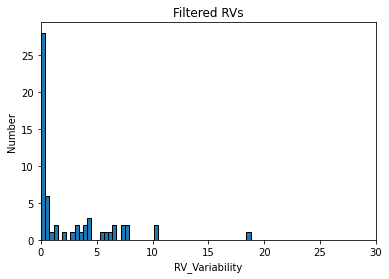

In [8]:
rv = pd.DataFrame(rv)

count, edges = np.histogram(rv, bins=50)

rv.plot(kind='hist', bins=50, edgecolor='black', alpha=1, legend=None)
plt.title('Filtered RVs')
plt.xlabel('RV_Variability')
plt.ylabel('Number')
plt.xlim(0,30)
#plt.savefig(path3 + 'Filtered_rv_' + runID + '.png')
#plt.show()


In [9]:
print(count)
print(edges)

[28  6  1  2  0  1  0  1  2  1  2  3  0  0  1  1  1  2  0  2  2  0  0  0
  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  1]
[5.49598410e-03 3.81227064e-01 7.56958143e-01 1.13268922e+00
 1.50842030e+00 1.88415138e+00 2.25988246e+00 2.63561354e+00
 3.01134462e+00 3.38707570e+00 3.76280678e+00 4.13853786e+00
 4.51426894e+00 4.89000002e+00 5.26573110e+00 5.64146218e+00
 6.01719326e+00 6.39292434e+00 6.76865542e+00 7.14438650e+00
 7.52011758e+00 7.89584866e+00 8.27157974e+00 8.64731082e+00
 9.02304190e+00 9.39877298e+00 9.77450406e+00 1.01502351e+01
 1.05259662e+01 1.09016973e+01 1.12774284e+01 1.16531595e+01
 1.20288905e+01 1.24046216e+01 1.27803527e+01 1.31560838e+01
 1.35318149e+01 1.39075459e+01 1.42832770e+01 1.46590081e+01
 1.50347392e+01 1.54104703e+01 1.57862013e+01 1.61619324e+01
 1.65376635e+01 1.69133946e+01 1.72891256e+01 1.76648567e+01
 1.80405878e+01 1.84163189e+01 1.87920500e+01]
